Libraries loaded successfully.
RC filter cutoff frequency (Hz): 23405.1
Sallen-Key cutoff frequency (Hz): 25291.4
Sallen-Key Q factor: 1.234
Roll-off slope near 10 kHz (transition region): 1.02 dB/decade
Roll-off slope in stopband (100 kHz–1 MHz): -60.10 dB/decade


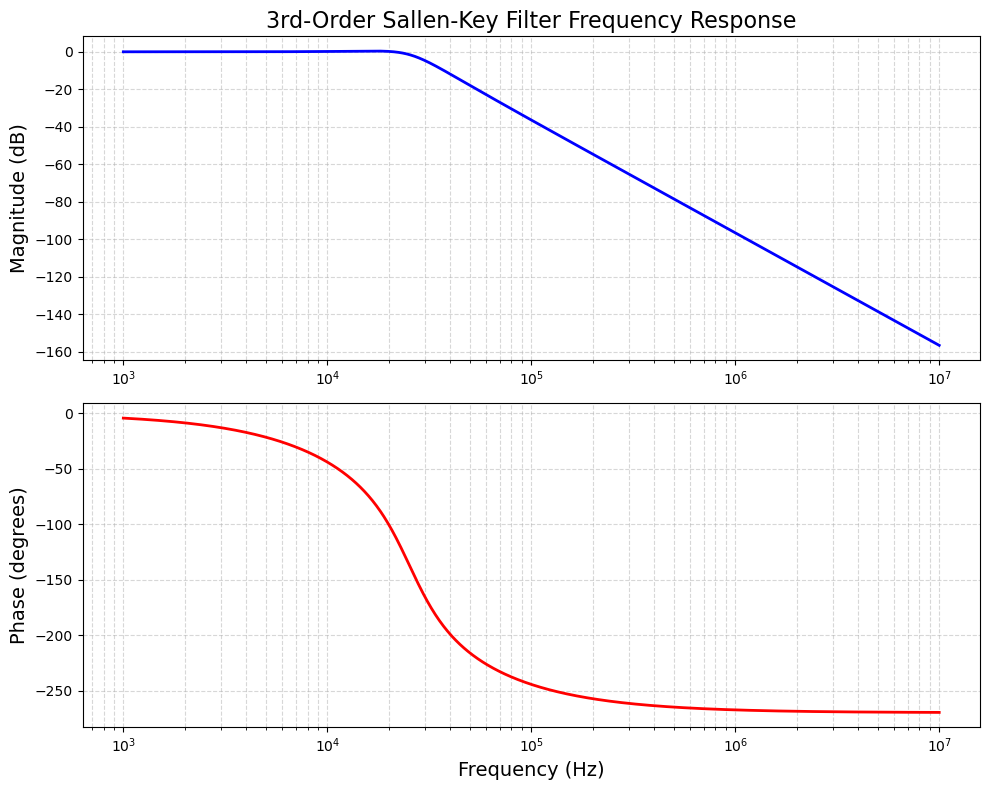

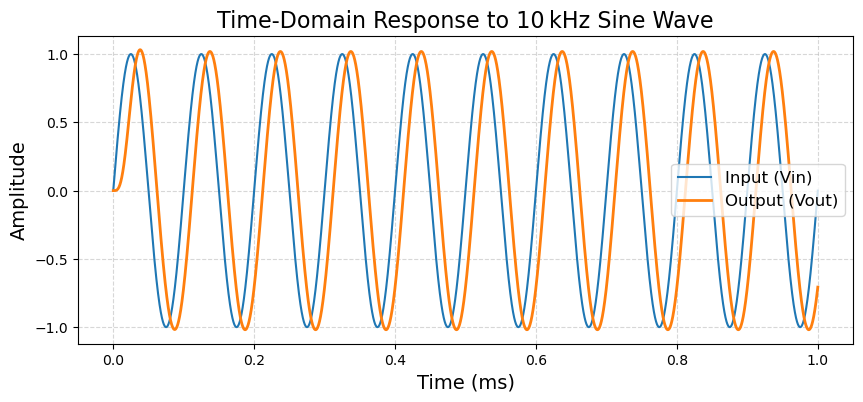

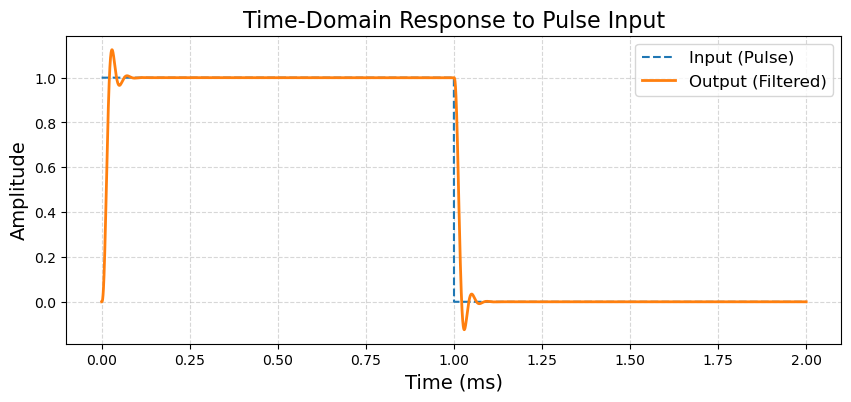

In [15]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

print("Libraries loaded successfully.")

# Define Component Values
R1 = 22e3      # 22 kΩ
R2 = 12e3      # 12 kΩ
R5 = 6.8e3     # 6.8 kΩ

C1 = 150e-12   # 150 pF
C2 = 1e-9      # 1 nF
C5 = 1e-9      # 1 nF

# RC 1st-order Low-Pass Filter
f_RC = 1 / (2 * np.pi * R5 * C5)
print(f"RC filter cutoff frequency (Hz): {f_RC:.1f}")

num_RC = [1]
den_RC = [R5 * C5, 1]
H_RC = signal.TransferFunction(num_RC, den_RC)

# Sallen-Key 2nd-order Low-Pass Filter
omega_0 = 1 / np.sqrt(R1 * R2 * C1 * C2)
f_0 = omega_0 / (2 * np.pi)
print(f"Sallen-Key cutoff frequency (Hz): {f_0:.1f}")

Q = np.sqrt((R2 * C2) / (R1 * C1)) / ((R1 + R2) / R1)
print(f"Sallen-Key Q factor: {Q:.3f}")

num_SK = [omega_0**2]
den_SK = [1, omega_0 / Q, omega_0**2]
H_SK = signal.TransferFunction(num_SK, den_SK)

# Combined 3rd-Order Transfer Function
num_total = np.polymul(num_RC, num_SK)
den_total = np.polymul(den_RC, den_SK)
H_total = signal.TransferFunction(num_total, den_total)

# Bode Plot
f = np.logspace(3, 7, 1000)  # 1 kHz to 10 MHz
w = 2 * np.pi * f
w, mag, phase = signal.bode(H_total, w)

# Calculate roll-off slope near 10 kHz (transition region)
f_transition = np.logspace(np.log10(8e3), np.log10(15e3), 500)
w_transition = 2 * np.pi * f_transition
_, mag_transition, _ = signal.bode(H_total, w_transition)
slope_transition, _ = np.polyfit(np.log10(f_transition), mag_transition, 1)

# Calculate roll-off slope in stopband (100 kHz to 1 MHz)
f_stopband = np.logspace(5, 6, 500)
w_stopband = 2 * np.pi * f_stopband
_, mag_stopband, _ = signal.bode(H_total, w_stopband)
slope_stopband, _ = np.polyfit(np.log10(f_stopband), mag_stopband, 1)

# Print Slope Results
print(f"Roll-off slope near 10 kHz (transition region): {slope_transition:.2f} dB/decade")
print(f"Roll-off slope in stopband (100 kHz–1 MHz): {slope_stopband:.2f} dB/decade")

# Plot Bode Plot
plt.figure(figsize=(10, 8))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(f, mag, 'b', linewidth=2)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.ylabel('Magnitude (dB)', fontsize=14)
plt.title('3rd-Order Sallen-Key Filter Frequency Response', fontsize=16)

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(f, phase, 'r', linewidth=2)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Phase (degrees)', fontsize=14)

plt.tight_layout()
plt.show()

# Time-Domain Response to 10 kHz Sine Wave
t = np.linspace(0, 1e-3, 10000)  # 1 ms, 10,000 points
Vin = np.sin(2 * np.pi * 10e3 * t)

t_out, y_out, _ = signal.lsim(H_total, Vin, t)

plt.figure(figsize=(10, 4))
plt.plot(t * 1e3, Vin, label='Input (Vin)')
plt.plot(t_out * 1e3, y_out, label='Output (Vout)', linewidth=2)
plt.xlabel('Time (ms)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.title('Time-Domain Response to 10 kHz Sine Wave', fontsize=16)
plt.show()

# Time-Domain Response to Pulse Input
t_pulse = np.linspace(0, 2e-3, 10000)  # 2 ms
Vin_pulse = np.where(t_pulse < 1e-3, 1, 0)  # Pulse: 1 V for first 1 ms, then 0

t_out_pulse, y_out_pulse, _ = signal.lsim(H_total, Vin_pulse, t_pulse)

plt.figure(figsize=(10, 4))
plt.plot(t_pulse * 1e3, Vin_pulse, label='Input (Pulse)', linestyle='--')
plt.plot(t_out_pulse * 1e3, y_out_pulse, label='Output (Filtered)', linewidth=2)
plt.xlabel('Time (ms)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.title('Time-Domain Response to Pulse Input', fontsize=16)
plt.show()


